In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import re
import hashlib
from collections import defaultdict
from collections import OrderedDict


In [2]:

# Read the CSV files into DataFrames
freight_df = pd.read_csv('../raw_data/Major_Freight_Users.csv')
traffic_df = pd.read_csv('../raw_data/Major_Traffic_Generators.csv')

In [3]:
#show the first few rows of the DataFrame
freight_df.head()

,OBJECTID,KBIF ID,Facility Name,Facility Street Address,City Name,State,Zip Code,County Name,Area Development District,NAICS Code,...,End Active Date,GlobalID,last_edited_date,created_user,created_date,last_edited_user,MP,RT_NUMBER,x,y
0,1,1522,Corning Incorporated,680 East Office St,Harrodsburg,KY,40330-1300,Mercer,BGADD,327211,...,NaN,e4f57a55-65d1-4385-a45f-77e50ec6e2df,6/30/2021 12:00:00 AM,NaN,NaN,EMILY.BARTEE,NaN,NaN,-9.443214e+06,4.545184e+06
1,2,4164,"FIAT Products, LLC",706 Highway 3057,Somerset,KY,42501-3302,Pulaski,LCADD,326191,...,NaN,32c75322-da75-4ef2-8676-2e7bd48ecd03,6/28/2024 12:00:00 AM,NaN,NaN,EMILY.BARTEE,NaN,NaN,-9.417573e+06,4.446790e+06
2,3,2169,Omico Plastics Inc,2025 Ragu Drive,Owensboro,KY,42303-,Daviess,GRADD,326199,...,NaN,52970649-d6fc-49d3-ae6f-890778bdbc4b,6/23/2022 12:00:00 AM,NaN,NaN,EMILY.BARTEE,NaN,NaN,-9.693001e+06,4.546117e+06
3,4,0,UNKNOWN,811 RAVEN AVE,BOWLING GREEN,KY,42101,Warren,BRADD,,...,NaN,696903f3-df9c-4e6a-9fe8-847edd303505,9/8/2021 12:00:00 AM,NaN,NaN,EMILY.BARTEE,NaN,NaN,-9.623290e+06,4.440055e+06
4,5,244318100,Sister Schubert's Homemade Rolls Inc,900 Top Quality Drive,Horse Cave,KY,42749-,Hart,BRADD,"311812, 493120",...,NaN,474ce242-fb81-43c4-9a4c-8c710dcc4d79,6/2/2020 12:00:00 AM,NaN,NaN,EMILY.BARTEE,NaN,NaN,-9.564086e+06,4.461565e+06


In [4]:
#show the first few rows of the DataFrame
traffic_df.head()

,OBJECTID,Facility Name,Facility Street Address,City Name,State,ZIP Code,County Name,Facility Description,Facility SQ Feet,Number of Employees,...,Update Indicator,End Active Date,GUID_Str,Last Edited Date,GlobalID,created_user,created_date,last_edited_user,x,y
0,1,Taylor County Hospital,1700 Old Lebanon Rd,Campbellsville,KY,42718,Taylor,Hospital,NaN,50.0,...,2,NaN,{F9331DB3-A9F7-40D1-8BE4-002E737AB0B6},9/25/2024 12:00:00 AM,cf32d3d3-1070-49db-8d43-fb48a591ca89,NaN,NaN,NaN,-9.499667e+06,4.490203e+06
1,2,FedEx Freight,5501 Burnt Pine Way,Louisville,KY,40228,Jefferson,Logistics,150000.0,90.0,...,2,NaN,{D57C4479-3E9C-4EBB-93F5-0035FBBFAFD9},8/30/2023 12:00:00 AM,9b84814a-525c-4159-a9e4-191ba9ce183f,NaN,NaN,NaN,-9.533609e+06,4.604194e+06
2,3,Cyrus One Data Center,7200 Industrial Rd,Florence,KY,41042,Boone,,NaN,NaN,...,2,NaN,{E23BC34C-CA27-40B7-9901-0066BC29D108},10/11/2024 12:00:00 AM,73337b68-b8f6-4c96-b22c-91a2623dee58,NaN,NaN,NaN,-9.419702e+06,4.718999e+06
3,4,Second Baptist Church,217 W Depot St,Greenville,KY,42345,Muhlenberg,Church,62152.0,NaN,...,2,NaN,{0E2394DC-184F-4D04-81AE-006707B0B8C1},8/24/2023 12:00:00 AM,69501dc3-5517-486f-a753-6891effdecf8,NaN,NaN,NaN,-9.705271e+06,4.468916e+06
4,5,Todd County Central High,US-181 S,Elkton,KY,42220,Todd,School,103698.0,NaN,...,2,NaN,{F2CFDD4D-9FE9-4B1C-984A-007E93F5224E},8/24/2023 12:00:00 AM,73218952-bacb-4fc8-bfb4-7ce783a06fb3,NaN,NaN,NaN,-9.702753e+06,4.410934e+06


In [5]:
#information about the DataFrame
freight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   OBJECTID                        1971 non-null   int64  
 1   KBIF ID                         1971 non-null   int64  
 2   Facility Name                   1971 non-null   object 
 3   Facility Street Address         1971 non-null   object 
 4   City Name                       1971 non-null   object 
 5   State                           1971 non-null   object 
 6   Zip Code                        1971 non-null   object 
 7   County Name                     1971 non-null   object 
 8   Area Development District       1971 non-null   object 
 9   NAICS Code                      1961 non-null   object 
 10  Building Sq Footage             1971 non-null   int64  
 11  Number of Employees             1971 non-null   int64  
 12  Average Trucks per Day          19

In [6]:
#information about the DataFrame
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4569 entries, 0 to 4568
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   OBJECTID                        4569 non-null   int64  
 1   Facility Name                   4569 non-null   object 
 2   Facility Street Address         4569 non-null   object 
 3   City Name                       4569 non-null   object 
 4   State                           4569 non-null   object 
 5   ZIP Code                        4569 non-null   object 
 6   County Name                     4569 non-null   object 
 7   Facility Description            4569 non-null   object 
 8   Facility SQ Feet                1689 non-null   float64
 9   Number of Employees             796 non-null    float64
 10  Average Trucks per Day          4569 non-null   int64  
 11  Truck Bays                      4569 non-null   int64  
 12  Average Trains per Week         45

In [7]:
#show the summary statistics of the DataFrame
freight_df.describe()

,OBJECTID,KBIF ID,Building Sq Footage,Number of Employees,Average Trucks per Day,Truck Bays,Average Trains Week,Facility Length of Rail,Number of Rail Doors,County Number,...,Route Suffix,Route Label,Update Indicator,End Active Date,created_user,created_date,MP,RT_NUMBER,x,y
count,1971.00000,1.971000e+03,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,...,0.0,0.0,1971.0,0.0,0.0,0.0,0.0,0.0,1.971000e+03,1.971000e+03
mean,986.00000,6.764963e+07,2.389283e+05,165.424658,33.143075,19.493151,3.122273,259.718924,0.254693,50.782344,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,-9.508469e+06,4.587371e+06
std,569.12301,1.624747e+08,4.986740e+05,439.587803,73.669290,34.666201,91.841901,1694.043626,1.892296,32.365878,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1.215144e+05,9.568393e+04
min,1.00000,0.000000e+00,3.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,-9.930879e+06,4.373249e+06
25%,493.50000,0.000000e+00,7.662250e+04,0.000000,8.000000,6.000000,0.000000,0.000000,0.000000,24.000000,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,-9.554158e+06,4.534981e+06
50%,986.00000,1.642000e+03,1.418920e+05,59.000000,18.000000,11.000000,0.000000,0.000000,0.000000,56.000000,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,-9.519118e+06,4.600606e+06
75%,1478.50000,7.306500e+03,2.500000e+05,165.000000,39.000000,21.000000,0.000000,0.000000,0.000000,63.000000,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,-9.420047e+06,4.620298e+06
max,1971.00000,6.832346e+08,1.277395e+07,8500.000000,2500.000000,1000.000000,4000.000000,45000.000000,48.000000,120.000000,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,-9.172870e+06,4.738333e+06


In [8]:
#show the summary statistics of the DataFrame
traffic_df.describe()

,OBJECTID,Facility SQ Feet,Number of Employees,Average Trucks per Day,Truck Bays,Average Trains per Week,Number of Rail Doors,Facility Length of Rail,Prior CHIF ID,Completed CHIF ID,...,Route Number,Route Label,RT Unique,Update Indicator,End Active Date,created_user,created_date,last_edited_user,x,y
count,4569.00000,1.689000e+03,796.000000,4569.000000,4569.000000,4569.000000,4569.000000,4569.000000,0.0,0.0,...,0.0,0.0,0.0,4569.0,0.0,0.0,0.0,0.0,4.569000e+03,4.569000e+03
mean,2285.00000,2.168867e+06,951.288945,3.910265,3.151455,0.917706,0.039396,39.228496,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-9.485204e+06,4.559648e+06
std,1319.10102,4.812638e+07,11367.274507,20.536708,13.745396,59.182376,0.715556,483.024056,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.461996e+05,9.661141e+04
min,1.00000,3.480000e+02,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-9.924762e+06,4.370124e+06
25%,1143.00000,3.900000e+04,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-9.565238e+06,4.480117e+06
50%,2285.00000,1.030000e+05,78.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-9.444717e+06,4.559518e+06
75%,3427.00000,2.500000e+05,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-9.402970e+06,4.612122e+06
max,4569.00000,1.923530e+09,227800.000000,520.000000,260.000000,4000.000000,35.000000,15000.000000,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,-9.136321e+06,4.738441e+06


In [9]:
#number of rows and columns
print("Freight DF shape:", freight_df.shape)
print("Traffic DF shape:", traffic_df.shape)

Freight DF shape: (1971, 44)
Traffic DF shape: (4569, 41)


In [10]:
# shows the data types and column names of the DataFrame
print(freight_df.dtypes)


OBJECTID                            int64
KBIF ID                             int64
Facility Name                      object
Facility Street Address            object
City Name                          object
State                              object
Zip Code                           object
County Name                        object
Area Development District          object
NAICS Code                         object
Building Sq Footage                 int64
Number of Employees                 int64
Average Trucks per Day              int64
Truck Bays                          int64
Average Trains Week                 int64
Facility Length of Rail             int64
Number of Rail Doors                int64
Prior CHAF ID                      object
Completed CHAF ID                  object
Existing CHAF ID                   object
Intermodal Connector Needs         object
Comments                           object
Meets Criteria                     object
Area Development District Name    

In [11]:
# shows the data types and column names of the DataFrame
print(traffic_df.dtypes)

OBJECTID                            int64
Facility Name                      object
Facility Street Address            object
City Name                          object
State                              object
ZIP Code                           object
County Name                        object
Facility Description               object
Facility SQ Feet                  float64
Number of Employees               float64
Average Trucks per Day              int64
Truck Bays                          int64
Average Trains per Week             int64
Number of Rail Doors                int64
Facility Length of Rail             int64
Web URL                            object
Comments                           object
Prior CHIF ID                     float64
Completed CHIF ID                 float64
Existing CHAF ID                  float64
District Number                     int64
District Name                      object
Area Development District          object
Area Development District Name    

In [12]:
# Check for missing values
print("Missing values in Freight DF:")
print(freight_df.isnull().sum())


Missing values in Freight DF:
OBJECTID                             0
KBIF ID                              0
Facility Name                        0
Facility Street Address              0
City Name                            0
State                                0
Zip Code                             0
County Name                          0
Area Development District            0
NAICS Code                          10
Building Sq Footage                  0
Number of Employees                  0
Average Trucks per Day               0
Truck Bays                           0
Average Trains Week                  0
Facility Length of Rail              0
Number of Rail Doors                 0
Prior CHAF ID                      397
Completed CHAF ID                    0
Existing CHAF ID                     0
Intermodal Connector Needs           0
Comments                            19
Meets Criteria                       0
Area Development District Name       0
County Number                     

In [13]:
# Check for missing values
print("Missing values in Traffic DF:")
print(traffic_df.isnull().sum())

Missing values in Traffic DF:
OBJECTID                             0
Facility Name                        0
Facility Street Address              0
City Name                            0
State                                0
ZIP Code                             0
County Name                          0
Facility Description                 0
Facility SQ Feet                  2880
Number of Employees               3773
Average Trucks per Day               0
Truck Bays                           0
Average Trains per Week              0
Number of Rail Doors                 0
Facility Length of Rail              0
Web URL                              0
Comments                             0
Prior CHIF ID                     4569
Completed CHIF ID                 4569
Existing CHAF ID                  4569
District Number                      0
District Name                        0
Area Development District            0
Area Development District Name       0
County Number                     

In [14]:
# convert all column names to lowercase to make easier to work with
traffic_df.columns = traffic_df.columns.str.lower()
# replace spaces with underscores to make easier to work with
traffic_df.columns = traffic_df.columns.str.replace(' ', '_')

In [15]:
# A list of columns to remove from the traffic_df DataFrame
remove_columns_traffic_df = [
    'last_edited_user',
    'created_date',
    'created_user',
    'last_edited_date',
    'end_active_date',
    'update_indicator',
    'rt_unique',
    'existing_chaf_id',
    'completed_chif_id',
    'prior_chif_id',
    'comments',
    'objectid',
    'guid_str',
    'globalid'


]
#drops columns listed in reomove_columns_traffic_df from traffic_df
traffic_df_cleaned = traffic_df.drop(columns=remove_columns_traffic_df)

In [16]:
# I did this to check what were in the columns when deciding which to drop used the same line of code and just changed the column name
print(traffic_df['zip_code'].head())

0    42718
1    40228
2    41042
3    42345
4    42220
Name: zip_code, dtype: object


In [17]:
# Check for missing values
print("Missing values in Freight DF:")
print(freight_df.isnull().sum())

Missing values in Freight DF:
OBJECTID                             0
KBIF ID                              0
Facility Name                        0
Facility Street Address              0
City Name                            0
State                                0
Zip Code                             0
County Name                          0
Area Development District            0
NAICS Code                          10
Building Sq Footage                  0
Number of Employees                  0
Average Trucks per Day               0
Truck Bays                           0
Average Trains Week                  0
Facility Length of Rail              0
Number of Rail Doors                 0
Prior CHAF ID                      397
Completed CHAF ID                    0
Existing CHAF ID                     0
Intermodal Connector Needs           0
Comments                            19
Meets Criteria                       0
Area Development District Name       0
County Number                     

In [18]:
# convert all column names to lowercase to make easier to work with
freight_df.columns = freight_df.columns.str.lower()
# replace spaces with underscores to make easier to work with
freight_df.columns = freight_df.columns.str.replace(' ', '_')
# renamed zip_code_ to zip_code to match traffic_df
freight_df.rename(columns={'zip_code_': 'zip_code'}, inplace=True)


In [19]:
# A list of columns to remove from the freight_df DataFrame
remove_columns_freight_df = [
    'rt_number',
    'mp',
    'created_date',
    'last_edited_user',
    'created_user',
    'last_edited_date',
    'end_active_date',
    'update_indicator',
    'rt_unique',
    'comments',
    'existing_chaf_id',
    'completed_chaf_id',
    'prior_chaf_id',
    'objectid',
    'kbif_id',
    'guid_str',
    'meets_criteria',
    'globalid',
    ]
#drops columns listed in reomove_columns_freight_df from freight_df
freight_df_cleaned = freight_df.drop(columns=remove_columns_freight_df)

In [20]:
# I did this to check what were in the columns when deciding which to drop used the same line of code and just changed the column name
print(freight_df['meets_criteria'].head())

0    YES
1    YES
2    YES
3    YES
4    YES
Name: meets_criteria, dtype: object


In [21]:
# printing the column names of the cleaned traffic_df to see what is left and to prepare for merging
print(traffic_df_cleaned.columns)

Index(['facility_name', 'facility_street_address', 'city_name', 'state',
       'zip_code', 'county_name', 'facility_description', 'facility_sq_feet',
       'number_of_employees', 'average_trucks_per_day', 'truck_bays',
       'average_trains_per_week', 'number_of_rail_doors',
       'facility_length_of_rail', 'web_url', 'district_number',
       'district_name', 'area_development_district',
       'area_development_district_name', 'county_number', 'milepoint',
       'road_name', 'route_prefix', 'route_number', 'route_label', 'x', 'y'],
      dtype='object')


In [22]:
# printing the column names of the cleaned freight_df to see what is left and to prepare for merging
print(freight_df_cleaned.columns)

Index(['facility_name', 'facility_street_address', 'city_name', 'state',
       'zip_code', 'county_name', 'area_development_district', 'naics_code',
       'building_sq_footage', 'number_of_employees', 'average_trucks_per_day',
       'truck_bays', 'average_trains_week', 'facility_length_of_rail',
       'number_of_rail_doors', 'intermodal_connector_needs',
       'area_development_district_name', 'county_number', 'district_number',
       'district_name', 'road_name', 'route_prefix', 'route_suffix',
       'route_label', 'x', 'y'],
      dtype='object')


In [23]:
# this function normalizes all string columns in a dataframe
def normalize_all_strings(df):
    for col in df.select_dtypes(include='object').columns:
        df[col] = (
            df[col]
            .fillna('')
            .str.lower()
            .str.strip()
            # drops all punctuiation
            .str.replace(r'[^\w\s]', '', regex=True)
            # colapses multiple spaces into a single space
            .str.replace(r'\s+', ' ', regex=True)
            .str.replace('apt', '', regex=False)
            .str.replace('suite', '', regex=False)
            .str.replace('#', '', regex=False)
            .str.replace(r'\d+[a-zA-Z]?$', '', regex=True)
            .str.replace('unit', '', regex=False)
            .str.replace('building', '', regex=False)
            .str.replace('floor', '', regex=False)
            .str.replace('room', '', regex=False)
            .str.replace('dept', '', regex=False)
            .str.replace('division', '', regex=False)
            .str.replace('office', '', regex=False)
            .str.replace('north', 'n', regex=False)
            .str.replace('south', 's', regex=False)
            .str.replace('east', 'e', regex=False)
            .str.replace('west', 'w', regex=False)
            .str.replace(r'\bnorth\b', 'n', regex=True)
            .str.replace(r'\bsouth\b', 's', regex=True)
            .str.replace(r'\beast\b', 'e', regex=True)
            .str.replace(r'\bwest\b', 'w', regex=True)
            .str.replace(r'\bnortheast\b', 'ne', regex=True)
            .str.replace(r'\bsouthwest\b', 'sw', regex=True)
            .str.replace('circle', 'cir', regex=False)
            .str.replace('place', 'pl', regex=False)
            .str.replace('terrace', 'ter', regex=False)
            .str.replace('parkway', 'pkwy', regex=False)
            .str.replace('expressway', 'expy', regex=False)
            .str.replace('highway', 'hwy', regex=False)
            # removes metatags and other unnecessary text
            .str.replace(r'\s*\(.*?\)', '', regex=True)
            .str.replace(r'\s*-\s*.*$', '', regex=True)
            .str.replace(r'\b(llc|inc|corp|co|ltd)\b', '', regex=True)
            .str.replace('distribution center', 'dc', regex=False)
            .str.replace('fulfillment center', 'fc', regex=False)
            .str.replace('warehouse', 'whse', regex=False)
            .str.replace('street', 'st', regex=False)
            .str.replace('avenue', 'ave', regex=False)
            .str.replace('drive', 'dr', regex=False)
            .str.replace('road', 'rd', regex=False)
            .str.replace('boulevard', 'blvd', regex=False)
            .str.replace('lane', 'ln', regex=False) 
            .str.replace('court', 'ct', regex=False)
            .str.replace(r'\s+', ' ', regex=True)
            .str.strip()
        )

        if col == 'zip_code':
            df[col] = (
                df[col]
                .str.extract(r'(\d{5})')[0]
                .fillna('00000')
                .astype(str)
                .str.zfill(5)
            )

    return df


In [24]:
# uses the normalize strings function and assigns the cleaned dataframes to new variables
freight_df_cleaned = normalize_all_strings(freight_df_cleaned)
traffic_df_cleaned = normalize_all_strings(traffic_df_cleaned)

In [25]:
# this shows zip codes that are in freight_df but not in traffic_df
freight_zips = set(freight_df_cleaned['zip_code'])
traffic_zips = set(traffic_df_cleaned['zip_code'])
print(freight_zips - traffic_zips) 

set()


In [26]:
# joins the two DataFrames on the zip_code and street address columns freight_df merged columns will end in _x and traffic_df will end in _y  
# the keys used (zip_code and county_number) are merged into one and will not end in _x or _y
# this is a inner join so only rows with matching keys in both DataFrames will be included
merged_df = pd.merge(freight_df_cleaned, traffic_df_cleaned, on=['zip_code', 'facility_street_address'], how='inner')

In [27]:
# used this to check the shape of the merged DataFrame to see which keys would be best to merge on
merged_df.shape

(823, 51)

In [28]:
merged_df.columns

Index(['facility_name_x', 'facility_street_address', 'city_name_x', 'state_x',
       'zip_code', 'county_name_x', 'area_development_district_x',
       'naics_code', 'building_sq_footage', 'number_of_employees_x',
       'average_trucks_per_day_x', 'truck_bays_x', 'average_trains_week',
       'facility_length_of_rail_x', 'number_of_rail_doors_x',
       'intermodal_connector_needs', 'area_development_district_name_x',
       'county_number_x', 'district_number_x', 'district_name_x',
       'road_name_x', 'route_prefix_x', 'route_suffix', 'route_label_x', 'x_x',
       'y_x', 'facility_name_y', 'city_name_y', 'state_y', 'county_name_y',
       'facility_description', 'facility_sq_feet', 'number_of_employees_y',
       'average_trucks_per_day_y', 'truck_bays_y', 'average_trains_per_week',
       'number_of_rail_doors_y', 'facility_length_of_rail_y', 'web_url',
       'district_number_y', 'district_name_y', 'area_development_district_y',
       'area_development_district_name_y', 'count

In [29]:
# shows the first few rows of the merged DataFrame to see what it looks like
merged_df.head(10)

,facility_name_x,facility_street_address,city_name_x,state_x,zip_code,county_name_x,area_development_district_x,naics_code,building_sq_footage,number_of_employees_x,...,area_development_district_y,area_development_district_name_y,county_number_y,milepoint,road_name_y,route_prefix_y,route_number,route_label_y,x_y,y_y
0,corning incorporated,680 e st,harrodsburg,ky,00000,mercer,bgadd,,198500,400,...,bgadd,bluegrass add,84,NaN,NaN,NaN,NaN,NaN,-9.443209e+06,4.545300e+06
1,omico plastics,2025 ragu dr,owensboro,ky,00000,daviess,gradd,,196000,67,...,gradd,green river add,30,NaN,NaN,NaN,NaN,NaN,-9.693000e+06,4.546118e+06
2,hobart,58 corporate dr,danville,ky,00000,boyle,bgadd,,90000,114,...,bgadd,bluegrass add,11,NaN,NaN,NaN,NaN,NaN,-9.441789e+06,4.526259e+06
3,bap,1261 aviation blvd,hebron,ky,00000,boone,nkadd,,112000,35,...,nkadd,nern kentucky add,8,NaN,NaN,NaN,NaN,NaN,-9.426281e+06,4.733320e+06
4,container packaging,1001 glengarry dr,fairdale,ky,00000,jefferson,kipda,,168000,0,...,kipda,kipda add,56,NaN,NaN,NaN,NaN,NaN,-9.545112e+06,4.597124e+06
5,mueller roofing,4301 boron ave,covington,ky,00000,kenton,nkadd,,138000,5,...,nkadd,nern kentucky add,59,NaN,NaN,NaN,NaN,NaN,-9.407878e+06,4.727720e+06
6,graham packaging plastic products,8283 dixie hwy,florence,ky,00000,boone,nkadd,,155000,54,...,nkadd,nern kentucky add,8,NaN,NaN,NaN,NaN,NaN,-9.419147e+06,4.717597e+06
7,flextronics america,4400 commerce crossings dr,louisville,ky,00000,jefferson,kipda,,500000,326,...,kipda,kipda add,56,NaN,NaN,NaN,NaN,NaN,-9.538683e+06,4.592510e+06
8,cvg2 amazoncomkydcllc,1600 worldwide blvd,hebron,ky,00000,boone,nkadd,423990 443142 454111 454113 493110,542960,2000,...,nkadd,nern kentucky add,8,NaN,NaN,NaN,NaN,NaN,-9.431644e+06,4.734134e+06
9,honeywell integrated,201 richard knock hwy,walton,ky,00000,kenton,nkadd,,900000,0,...,nkadd,nern kentucky add,59,NaN,NaN,NaN,NaN,NaN,-9.417133e+06,4.701791e+06


In [30]:
merged_df.tail(10)

,facility_name_x,facility_street_address,city_name_x,state_x,zip_code,county_name_x,area_development_district_x,naics_code,building_sq_footage,number_of_employees_x,...,area_development_district_y,area_development_district_name_y,county_number_y,milepoint,road_name_y,route_prefix_y,route_number,route_label_y,x_y,y_y
813,florida tile,1211 alton rd,lawrenceburg,ky,00000,anderson,bgadd,,428818,198,...,bgadd,bluegrass add,3,NaN,NaN,NaN,NaN,NaN,-9.454027e+06,4.589675e+06
814,clark distributing,200 commerce dr,madisonville,ky,00000,hopkins,peadd,,528788,0,...,peadd,pennyrile add,54,NaN,NaN,NaN,NaN,NaN,-9.738969e+06,4.487775e+06
815,eagle steel products,3420 collins ln,louisville,ky,00000,jefferson,kipda,,110000,30,...,kipda,kipda add,56,NaN,NaN,NaN,NaN,NaN,-9.520513e+06,4.621457e+06
816,watco logistics,6040 shepherdsville rd,louisville,ky,00000,jefferson,kipda,,140000,0,...,kipda,kipda add,56,NaN,NaN,NaN,NaN,NaN,-9.535825e+06,4.602208e+06
817,camco chemical,8150 holton dr,independence,ky,00000,kenton,nkadd,325611,230000,200,...,nkadd,nern kentucky add,59,NaN,NaN,NaN,NaN,NaN,-9.418839e+06,4.717945e+06
818,pratt target container,1901 international way,hebron,ky,00000,boone,nkadd,,220000,57,...,nkadd,nern kentucky add,8,NaN,NaN,NaN,NaN,NaN,-9.428862e+06,4.733985e+06
819,winchester coatings,1600 fortune dr,winchester,ky,00000,clark,bgadd,,69923,85,...,bgadd,bluegrass add,25,NaN,NaN,NaN,NaN,NaN,-9.370947e+06,4.582447e+06
820,us playing card company,300 gap way,erlanger,ky,00000,boone,nkadd,,520000,0,...,nkadd,nern kentucky add,8,NaN,NaN,NaN,NaN,NaN,-9.421158e+06,4.728321e+06
821,galerie,3380 langley dr,hebron,ky,00000,boone,nkadd,424450 493110,277000,110,...,nkadd,nern kentucky add,8,NaN,NaN,NaN,NaN,NaN,-9.429388e+06,4.730566e+06
822,signature hardware,2700 crescent springs pk,erlanger,ky,00000,kenton,nkadd,,304000,211,...,nkadd,nern kentucky add,59,NaN,NaN,NaN,NaN,NaN,-9.416099e+06,4.727910e+06


In [31]:
# this script counts the number of rows where both facility_name_x and facility_name_y are 'UNKNOWN'
# I converted entries to uppercase then checked if either facility_name_x or facility_name_y is 'UNKNOWN' if so it would == True
check_unknowns = (merged_df['facility_name_x'] == 'unknown') | (merged_df['facility_name_y'] == 'unknown')
total_unknowns = check_unknowns.sum()
print(total_unknowns)

3


In [32]:
merged_df.isnull().sum()

facility_name_x                       0
facility_street_address               0
city_name_x                           0
state_x                               0
zip_code                              0
county_name_x                         0
area_development_district_x           0
naics_code                            0
building_sq_footage                   0
number_of_employees_x                 0
average_trucks_per_day_x              0
truck_bays_x                          0
average_trains_week                   0
facility_length_of_rail_x             0
number_of_rail_doors_x                0
intermodal_connector_needs            0
area_development_district_name_x      0
county_number_x                       0
district_number_x                     0
district_name_x                       0
road_name_x                         823
route_prefix_x                      823
route_suffix                        823
route_label_x                       823
x_x                                   0


In [33]:
# created a temporary dadtaframe to work instead of the original merged_df
temp_df = merged_df.copy()
# creates 2 new columns with the facility names cleaned up
temp_df['facility_name_x_clean'] = temp_df['facility_name_x']
temp_df['facility_name_y_clean'] = temp_df['facility_name_y']



In [34]:
# checks if the cleaned facility names are the same
same_facility = temp_df['facility_name_x_clean'] == temp_df['facility_name_y_clean']

print(same_facility.sum())

419


In [35]:
# prints the first few rows of the temporary DataFrame where the facility names are the same
temp_df[same_facility].head()

,facility_name_x,facility_street_address,city_name_x,state_x,zip_code,county_name_x,area_development_district_x,naics_code,building_sq_footage,number_of_employees_x,...,county_number_y,milepoint,road_name_y,route_prefix_y,route_number,route_label_y,x_y,y_y,facility_name_x_clean,facility_name_y_clean
1,omico plastics,2025 ragu dr,owensboro,ky,00000,daviess,gradd,,196000,67,...,30,NaN,NaN,NaN,NaN,NaN,-9.693000e+06,4.546118e+06,omico plastics,omico plastics
2,hobart,58 corporate dr,danville,ky,00000,boyle,bgadd,,90000,114,...,11,NaN,NaN,NaN,NaN,NaN,-9.441789e+06,4.526259e+06,hobart,hobart
4,container packaging,1001 glengarry dr,fairdale,ky,00000,jefferson,kipda,,168000,0,...,56,NaN,NaN,NaN,NaN,NaN,-9.545112e+06,4.597124e+06,container packaging,container packaging
5,mueller roofing,4301 boron ave,covington,ky,00000,kenton,nkadd,,138000,5,...,59,NaN,NaN,NaN,NaN,NaN,-9.407878e+06,4.727720e+06,mueller roofing,mueller roofing
6,graham packaging plastic products,8283 dixie hwy,florence,ky,00000,boone,nkadd,,155000,54,...,8,NaN,NaN,NaN,NaN,NaN,-9.419147e+06,4.717597e+06,graham packaging plastic products,graham packaging plastic products


In [36]:
merged_df.shape

(823, 51)

In [37]:
merged_df = merged_df[merged_df["facility_street_address"].notna() & (merged_df["facility_street_address"].str.strip() != "")]

In [38]:
merged_df.shape

(742, 51)

In [39]:
merged_df_copy = merged_df.copy()

In [40]:
missing_address_sum = merged_df_copy['facility_street_address'].apply(
    lambda x: pd.isna(x) or str(x).strip() == ''
).sum()

print(missing_address_sum)




0


In [41]:
merged_df_copy.columns

Index(['facility_name_x', 'facility_street_address', 'city_name_x', 'state_x',
       'zip_code', 'county_name_x', 'area_development_district_x',
       'naics_code', 'building_sq_footage', 'number_of_employees_x',
       'average_trucks_per_day_x', 'truck_bays_x', 'average_trains_week',
       'facility_length_of_rail_x', 'number_of_rail_doors_x',
       'intermodal_connector_needs', 'area_development_district_name_x',
       'county_number_x', 'district_number_x', 'district_name_x',
       'road_name_x', 'route_prefix_x', 'route_suffix', 'route_label_x', 'x_x',
       'y_x', 'facility_name_y', 'city_name_y', 'state_y', 'county_name_y',
       'facility_description', 'facility_sq_feet', 'number_of_employees_y',
       'average_trucks_per_day_y', 'truck_bays_y', 'average_trains_per_week',
       'number_of_rail_doors_y', 'facility_length_of_rail_y', 'web_url',
       'district_number_y', 'district_name_y', 'area_development_district_y',
       'area_development_district_name_y', 'count

In [42]:
# this is a list called group_cols that will be used to group the DataFrame
group_cols = [
    'facility_street_address',
    'zip_code',
    'county_name_x',
    'county_name_y',
    'naics_code'
]

In [43]:
# This groups the Dataframe by the specified columns and aggregates the data
deduped_df = merged_df_copy.groupby(group_cols).agg({
    
# this aggregates the data by taking the maximum value for the specified columns
    'average_trucks_per_day_x': 'max',
    'average_trucks_per_day_y': 'max',
    'truck_bays_x': 'max',
    'truck_bays_y': 'max',

# this averages the x and y coordinates
    'x_x': 'mean',
    'y_x': 'mean',
    'x_y': 'mean',
    'y_y': 'mean',

# this takes the first value for building sq footage and the maximum for number of employees
    'building_sq_footage': 'first',
    'number_of_employees_x': 'max',
    'number_of_employees_y': 'max',

    'city_name_x': lambda x: ', '.join(sorted(set(x.dropna()))),
    'state_x': lambda x: ', '.join(sorted(set(x.dropna()))),

# this takes the first value for the district name and area development district
    'district_name_x': 'first',
    'district_name_y': 'first',
    'area_development_district_x': 'first',
    'area_development_district_y': 'first',

    'route_label_x': lambda x: ', '.join(sorted(set(x.dropna()))),
    'route_prefix_x': 'first',
    'route_suffix': 'first',
    'route_number': 'first',
    'milepoint': 'first',

    'facility_length_of_rail_x': 'max',
    'number_of_rail_doors_x': 'max',
    'average_trains_week': 'max',
    'average_trains_per_week': 'max',

    'facility_description': 'first',
    'facility_sq_feet': 'max',

    'road_name_x': lambda x: ', '.join(sorted(set(x.dropna()))),

# this combines the web URLs into one line prevents duplicates and dropes any NaN values
# lambda is used to create a custom aggregation function ', ' adds a comma and space between URLs join puts the urls on the same line
# sorted puts the URLs in alphabetical order set keeps only unique URLs dropna removes any NaN values
    'web_url': lambda x: ', '.join(sorted(set(x.dropna()))),

# this combines the facility names into one line prevents duplicates and dropes any NaN values
    'facility_name_x': lambda x: ', '.join(sorted(set(x.dropna()))),
    'facility_name_y': lambda x: ', '.join(sorted(set(x.dropna()))),

# this moves the groupby coulmns back to the original place and replaces index with a interger
}).reset_index()

In [44]:
deduped_df.columns

Index(['facility_street_address', 'zip_code', 'county_name_x', 'county_name_y',
       'naics_code', 'average_trucks_per_day_x', 'average_trucks_per_day_y',
       'truck_bays_x', 'truck_bays_y', 'x_x', 'y_x', 'x_y', 'y_y',
       'building_sq_footage', 'number_of_employees_x', 'number_of_employees_y',
       'city_name_x', 'state_x', 'district_name_x', 'district_name_y',
       'area_development_district_x', 'area_development_district_y',
       'route_label_x', 'route_prefix_x', 'route_suffix', 'route_number',
       'milepoint', 'facility_length_of_rail_x', 'number_of_rail_doors_x',
       'average_trains_week', 'average_trains_per_week',
       'facility_description', 'facility_sq_feet', 'road_name_x', 'web_url',
       'facility_name_x', 'facility_name_y'],
      dtype='object')

In [45]:
print("Grouped DataFrame columns:")
print(deduped_df.columns.tolist())

Grouped DataFrame columns:
['facility_street_address', 'zip_code', 'county_name_x', 'county_name_y', 'naics_code', 'average_trucks_per_day_x', 'average_trucks_per_day_y', 'truck_bays_x', 'truck_bays_y', 'x_x', 'y_x', 'x_y', 'y_y', 'building_sq_footage', 'number_of_employees_x', 'number_of_employees_y', 'city_name_x', 'state_x', 'district_name_x', 'district_name_y', 'area_development_district_x', 'area_development_district_y', 'route_label_x', 'route_prefix_x', 'route_suffix', 'route_number', 'milepoint', 'facility_length_of_rail_x', 'number_of_rail_doors_x', 'average_trains_week', 'average_trains_per_week', 'facility_description', 'facility_sq_feet', 'road_name_x', 'web_url', 'facility_name_x', 'facility_name_y']


In [46]:
deduped_df.head(10)

,facility_street_address,zip_code,county_name_x,county_name_y,naics_code,average_trucks_per_day_x,average_trucks_per_day_y,truck_bays_x,truck_bays_y,x_x,...,facility_length_of_rail_x,number_of_rail_doors_x,average_trains_week,average_trains_per_week,facility_description,facility_sq_feet,road_name_x,web_url,facility_name_x,facility_name_y
0,1 auto glass dr,00000,hardin,hardin,,30,0,25,0,-9.564962e+06,...,0,0,0,0,,72349.0,,,agc automotive americas,agc automotive americas
1,1 duro way,00000,boone,boone,322220,20,22,19,22,-9.418875e+06,...,900,4,3,2,,300000.0,,,duro bag a novolex brand,duro bag manufacturing
2,1 firestone blvd,00000,whitley,whitley,,28,0,14,0,-9.368631e+06,...,0,0,0,0,industry,NaN,,firestone airide air suspension air springs m,firestone industrial products,firestone industrial products
3,1 recycle way,00000,pulaski,pulaski,326199,20,0,9,0,-9.411640e+06,...,0,0,0,0,cardboard and plastic recycling waste reductio...,82000.0,,wwwsomersetrecyclingcom,somerset recycling service,somerset recycling service
4,1 sakura dr,00000,washington,washington,336370,70,0,12,0,-9.488866e+06,...,0,0,0,0,,430188.0,,,toyotomi america,toyotomi america
5,1 w 20th st,00000,bourbon,bourbon,315990,12,0,6,0,-9.380912e+06,...,0,0,0,0,,63100.0,,sekriorg,seern kentucky rehabilitation industries,seern kentucky rehabilitation industries
6,1 walle dr,00000,clark,clark,,8,0,4,0,-9.371929e+06,...,0,0,0,0,paper coating laminating for packaging,104000.0,,wwwwallecom,walle,walle
7,10 distillery rd,00000,daviess,daviess,,0,0,6,0,-9.700223e+06,...,600,1,0,0,distilleries,75000.0,,wwwgreenriverwhiskeycom,green river distilling,green river distilling
8,10 kingbrook pkwy,00000,shelby,shelby,322212,50,50,25,25,-9.500424e+06,...,0,0,0,0,packaging,122000.0,,wwwneffpackagingcom,neff packaging solutions,neff packaging
9,100 bourbon dr,00000,marion,marion,,0,0,5,0,-9.493098e+06,...,0,0,0,0,,NaN,,,diageo distillery,diageo distillery


In [47]:
# sum of missing or blank facility_street_address entries
missing_address_sum = deduped_df['facility_street_address'].apply(
    lambda x: pd.isna(x) or str(x).strip() == ''
).sum()

print(missing_address_sum)


0


In [48]:
# checking rows with blank or missing facility_street_address
missing_address_rows = deduped_df[
    deduped_df['facility_street_address'].isna() |
    (deduped_df['facility_street_address'].str.strip() == '')
]

missing_address_rows

,facility_street_address,zip_code,county_name_x,county_name_y,naics_code,average_trucks_per_day_x,average_trucks_per_day_y,truck_bays_x,truck_bays_y,x_x,...,facility_length_of_rail_x,number_of_rail_doors_x,average_trains_week,average_trains_per_week,facility_description,facility_sq_feet,road_name_x,web_url,facility_name_x,facility_name_y


In [49]:
# this shows the rows and columns of the deduped DataFrame
deduped_df.shape

(680, 37)

In [50]:
# this shows the columns of the deduped DataFrame
deduped_df.columns

Index(['facility_street_address', 'zip_code', 'county_name_x', 'county_name_y',
       'naics_code', 'average_trucks_per_day_x', 'average_trucks_per_day_y',
       'truck_bays_x', 'truck_bays_y', 'x_x', 'y_x', 'x_y', 'y_y',
       'building_sq_footage', 'number_of_employees_x', 'number_of_employees_y',
       'city_name_x', 'state_x', 'district_name_x', 'district_name_y',
       'area_development_district_x', 'area_development_district_y',
       'route_label_x', 'route_prefix_x', 'route_suffix', 'route_number',
       'milepoint', 'facility_length_of_rail_x', 'number_of_rail_doors_x',
       'average_trains_week', 'average_trains_per_week',
       'facility_description', 'facility_sq_feet', 'road_name_x', 'web_url',
       'facility_name_x', 'facility_name_y'],
      dtype='object')

In [51]:
deduped_df.head()

,facility_street_address,zip_code,county_name_x,county_name_y,naics_code,average_trucks_per_day_x,average_trucks_per_day_y,truck_bays_x,truck_bays_y,x_x,...,facility_length_of_rail_x,number_of_rail_doors_x,average_trains_week,average_trains_per_week,facility_description,facility_sq_feet,road_name_x,web_url,facility_name_x,facility_name_y
0,1 auto glass dr,00000,hardin,hardin,,30,0,25,0,-9.564962e+06,...,0,0,0,0,,72349.0,,,agc automotive americas,agc automotive americas
1,1 duro way,00000,boone,boone,322220,20,22,19,22,-9.418875e+06,...,900,4,3,2,,300000.0,,,duro bag a novolex brand,duro bag manufacturing
2,1 firestone blvd,00000,whitley,whitley,,28,0,14,0,-9.368631e+06,...,0,0,0,0,industry,NaN,,firestone airide air suspension air springs m,firestone industrial products,firestone industrial products
3,1 recycle way,00000,pulaski,pulaski,326199,20,0,9,0,-9.411640e+06,...,0,0,0,0,cardboard and plastic recycling waste reductio...,82000.0,,wwwsomersetrecyclingcom,somerset recycling service,somerset recycling service
4,1 sakura dr,00000,washington,washington,336370,70,0,12,0,-9.488866e+06,...,0,0,0,0,,430188.0,,,toyotomi america,toyotomi america


In [52]:
def compare_columns(df, col1, col2):
# this cleans the columns by stripping whitespace and converting to uppercase
    val1 = df[col1].astype(str).str.strip().str.upper()
    val2 = df[col2].astype(str).str.strip().str.upper()
# this compares the two columns and returns true or false for each row
    match = val1 == val2

# this counts the number of matches and mismatches
    num_matches = match.sum()
    num_mismatches = len(df) - num_matches

# this prints the results
    print(f"Total matches between '{col1}' and '{col2}': {num_matches}")
    print(f"Total mismatches: {num_mismatches}\n")
# this prints the mismatched rows if there are any
    if num_mismatches > 0:
        print("Mismatched Rows:")
        print(df.loc[~match, [col1, col2]])


In [53]:
compare_columns(deduped_df, 'facility_name_x', 'facility_name_y')

Total matches between 'facility_name_x' and 'facility_name_y': 385
Total mismatches: 295

Mismatched Rows:
                               facility_name_x  \
1                     duro bag a novolex brand   
8                     neff packaging solutions   
14                           continental mills   
15                           toyotetsu america   
18   kloeckner metals, nucor steel brandenburg   
..                                         ...   
675                   ghent generating station   
676                   ghent generating station   
677                   ghent generating station   
678                   ghent generating station   
679                   ghent generating station   

                             facility_name_y  
1                     duro bag manufacturing  
8                             neff packaging  
14                                  krusteaz  
15   toyotetsu america sub toyoda iron works  
18                   nucor steel brandenburg  
..        

In [54]:
deduped_df[['x_x', 'x_y', 'y_x', 'y_y']]

,x_x,x_y,y_x,y_y
0,-9.564962e+06,-9.564983e+06,4.532985e+06,4.532989e+06
1,-9.418875e+06,-9.418875e+06,4.710241e+06,4.710241e+06
2,-9.368631e+06,-9.368542e+06,4.400464e+06,4.400493e+06
3,-9.411640e+06,-9.411638e+06,4.458852e+06,4.458844e+06
4,-9.488866e+06,-9.488442e+06,4.535043e+06,4.534761e+06
...,...,...,...,...
675,-9.466126e+06,-9.196154e+06,4.685697e+06,4.643941e+06
676,-9.466126e+06,-9.402519e+06,4.685697e+06,4.726124e+06
677,-9.466126e+06,-9.471390e+06,4.685697e+06,4.679284e+06
678,-9.466126e+06,-9.802865e+06,4.685697e+06,4.488118e+06


In [55]:
# replacing blank strings with NaN in the specified columns
for col in ["building_sq_footage", "facility_sq_feet"]:
    deduped_df[col] = deduped_df[col].replace(["", " "], np.nan)

# adding a new column 'facility_sqft' that takes the maximum value between 'building_sq_footage' and 'facility_sq_feet'
deduped_df["facility_sqft"] = deduped_df[["building_sq_footage", "facility_sq_feet"]].max(axis=1)

In [56]:
deduped_df.drop(columns=["building_sq_footage"], inplace=True)

In [57]:
deduped_df.columns

Index(['facility_street_address', 'zip_code', 'county_name_x', 'county_name_y',
       'naics_code', 'average_trucks_per_day_x', 'average_trucks_per_day_y',
       'truck_bays_x', 'truck_bays_y', 'x_x', 'y_x', 'x_y', 'y_y',
       'number_of_employees_x', 'number_of_employees_y', 'city_name_x',
       'state_x', 'district_name_x', 'district_name_y',
       'area_development_district_x', 'area_development_district_y',
       'route_label_x', 'route_prefix_x', 'route_suffix', 'route_number',
       'milepoint', 'facility_length_of_rail_x', 'number_of_rail_doors_x',
       'average_trains_week', 'average_trains_per_week',
       'facility_description', 'facility_sq_feet', 'road_name_x', 'web_url',
       'facility_name_x', 'facility_name_y', 'facility_sqft'],
      dtype='object')

In [58]:
# created a copy of the deduped_df to keep the original intact
merged_df_cleaned = deduped_df.copy()

In [59]:
# decided to keep the x and y coordinates from the traffic_df because they fit my usecase better as they likley snap to the road network better
merged_df_cleaned['x'] = merged_df_cleaned['x_y']
merged_df_cleaned['y'] = merged_df_cleaned['y_y']

In [60]:
merged_df_cleaned.columns

Index(['facility_street_address', 'zip_code', 'county_name_x', 'county_name_y',
       'naics_code', 'average_trucks_per_day_x', 'average_trucks_per_day_y',
       'truck_bays_x', 'truck_bays_y', 'x_x', 'y_x', 'x_y', 'y_y',
       'number_of_employees_x', 'number_of_employees_y', 'city_name_x',
       'state_x', 'district_name_x', 'district_name_y',
       'area_development_district_x', 'area_development_district_y',
       'route_label_x', 'route_prefix_x', 'route_suffix', 'route_number',
       'milepoint', 'facility_length_of_rail_x', 'number_of_rail_doors_x',
       'average_trains_week', 'average_trains_per_week',
       'facility_description', 'facility_sq_feet', 'road_name_x', 'web_url',
       'facility_name_x', 'facility_name_y', 'facility_sqft', 'x', 'y'],
      dtype='object')

In [61]:
# getting rid of the unneeded coulmns
coord_drop = ['x_x', 'x_y', 'y_x', 'y_y']
merged_df_cleaned.drop(columns=coord_drop, inplace=True)


In [62]:
merged_df_cleaned.columns

Index(['facility_street_address', 'zip_code', 'county_name_x', 'county_name_y',
       'naics_code', 'average_trucks_per_day_x', 'average_trucks_per_day_y',
       'truck_bays_x', 'truck_bays_y', 'number_of_employees_x',
       'number_of_employees_y', 'city_name_x', 'state_x', 'district_name_x',
       'district_name_y', 'area_development_district_x',
       'area_development_district_y', 'route_label_x', 'route_prefix_x',
       'route_suffix', 'route_number', 'milepoint',
       'facility_length_of_rail_x', 'number_of_rail_doors_x',
       'average_trains_week', 'average_trains_per_week',
       'facility_description', 'facility_sq_feet', 'road_name_x', 'web_url',
       'facility_name_x', 'facility_name_y', 'facility_sqft', 'x', 'y'],
      dtype='object')

In [63]:
# this checks if county names match then prints the matches
county_name_matches = merged_df_cleaned['county_name_x'] == merged_df_cleaned['county_name_y']
print("County name matches:", county_name_matches.sum())
# this checks for mismatches in county names and prints the count
county_name_mismatches = merged_df_cleaned.loc[~county_name_matches, ['county_name_x', 'county_name_y']]
county_name_mismatches_count = county_name_mismatches.shape[0]
print("County name mismatches count:", county_name_mismatches_count)
# this is a for loop that iterates over the mismatched rows and prints the county names
for index, row in county_name_mismatches.iterrows():
    print(f"Row {index}: {row['county_name_x']} | {row['county_name_y']}")

County name matches: 657
County name mismatches count: 23
Row 30: allen | taylor
Row 46: woodford | washington
Row 125: pulaski | marion
Row 233: boyle | marion
Row 461: kenton | boone
Row 489: kenton | boone
Row 621: kenton | boone
Row 623: boone | kenton
Row 626: kenton | boone
Row 660: laurel | daviess
Row 661: warren | madison
Row 662: gallatin | bath
Row 664: gallatin | greenup
Row 665: gallatin | knox
Row 666: gallatin | lewis
Row 667: gallatin | mason
Row 668: gallatin | menifee
Row 669: gallatin | morgan
Row 670: gallatin | pendleton
Row 675: carroll | boyd
Row 676: carroll | campbell
Row 678: carroll | crittenden
Row 679: carroll | rowan


In [64]:
# checking how many county names are mismatched for each county and in which column
print(county_name_mismatches['county_name_x'].value_counts())
print(county_name_mismatches['county_name_y'].value_counts())

county_name_x
gallatin    8
kenton      4
carroll     4
allen       1
woodford    1
pulaski     1
boone       1
boyle       1
warren      1
laurel      1
Name: count, dtype: int64
county_name_y
boone         4
marion        2
taylor        1
washington    1
kenton        1
daviess       1
madison       1
bath          1
greenup       1
knox          1
lewis         1
mason         1
menifee       1
morgan        1
pendleton     1
boyd          1
campbell      1
crittenden    1
rowan         1
Name: count, dtype: int64


In [65]:
# this combines the councatenates names into one column, filling NaN values with the other column's value
merged_df_cleaned['county_name'] = merged_df_cleaned[['county_name_x', 'county_name_y']].apply(
    lambda row: ', '.join([val for val in row if pd.notna(val)]), axis=1
)

In [66]:
# this drops the old county name columns as they are no longer needed
merged_df_cleaned.drop(columns=['county_name_x', 'county_name_y'], inplace=True)

In [67]:
# checking columns to confirm the changes
merged_df_cleaned.columns

Index(['facility_street_address', 'zip_code', 'naics_code',
       'average_trucks_per_day_x', 'average_trucks_per_day_y', 'truck_bays_x',
       'truck_bays_y', 'number_of_employees_x', 'number_of_employees_y',
       'city_name_x', 'state_x', 'district_name_x', 'district_name_y',
       'area_development_district_x', 'area_development_district_y',
       'route_label_x', 'route_prefix_x', 'route_suffix', 'route_number',
       'milepoint', 'facility_length_of_rail_x', 'number_of_rail_doors_x',
       'average_trains_week', 'average_trains_per_week',
       'facility_description', 'facility_sq_feet', 'road_name_x', 'web_url',
       'facility_name_x', 'facility_name_y', 'facility_sqft', 'x', 'y',
       'county_name'],
      dtype='object')

In [68]:
# observing the first few rows of the cleaned DataFrame to see the changes
merged_df_cleaned['county_name'].head()

0            hardin, hardin
1              boone, boone
2          whitley, whitley
3          pulaski, pulaski
4    washington, washington
Name: county_name, dtype: object

In [69]:
merged_df_cleaned.head()

,facility_street_address,zip_code,naics_code,average_trucks_per_day_x,average_trucks_per_day_y,truck_bays_x,truck_bays_y,number_of_employees_x,number_of_employees_y,city_name_x,...,facility_description,facility_sq_feet,road_name_x,web_url,facility_name_x,facility_name_y,facility_sqft,x,y,county_name
0,1 auto glass dr,00000,,30,0,25,0,800,NaN,elizabethtown,...,,72349.0,,,agc automotive americas,agc automotive americas,723496.0,-9.564983e+06,4.532989e+06,"hardin, hardin"
1,1 duro way,00000,322220,20,22,19,22,286,NaN,walton,...,,300000.0,,,duro bag a novolex brand,duro bag manufacturing,300000.0,-9.418875e+06,4.710241e+06,"boone, boone"
2,1 firestone blvd,00000,,28,0,14,0,400,NaN,williamsburg,...,industry,NaN,,firestone airide air suspension air springs m,firestone industrial products,firestone industrial products,365000.0,-9.368542e+06,4.400493e+06,"whitley, whitley"
3,1 recycle way,00000,326199,20,0,9,0,84,105.0,somerset,...,cardboard and plastic recycling waste reductio...,82000.0,,wwwsomersetrecyclingcom,somerset recycling service,somerset recycling service,82000.0,-9.411638e+06,4.458844e+06,"pulaski, pulaski"
4,1 sakura dr,00000,336370,70,0,12,0,500,NaN,springfield,...,,430188.0,,,toyotomi america,toyotomi america,611000.0,-9.488442e+06,4.534761e+06,"washington, washington"


In [70]:
compare_columns(merged_df_cleaned, 'average_trucks_per_day_x', 'average_trucks_per_day_y')

Total matches between 'average_trucks_per_day_x' and 'average_trucks_per_day_y': 269
Total mismatches: 411

Mismatched Rows:
     average_trucks_per_day_x  average_trucks_per_day_y
0                          30                         0
1                          20                        22
2                          28                         0
3                          20                         0
4                          70                         0
..                        ...                       ...
658                        18                         0
659                         0                         7
661                        24                         0
673                        20                         0
674                        12                         6

[411 rows x 2 columns]


In [71]:
# making sure the data types of the average trucks per day columns are the same
print(merged_df_cleaned[['average_trucks_per_day_x', 'average_trucks_per_day_y']].dtypes)

average_trucks_per_day_x    int64
average_trucks_per_day_y    int64
dtype: object


In [72]:
# sums the average trucks per day columns, filling NaN values with 0
merged_df_cleaned["avg_trucks"] = merged_df_cleaned["average_trucks_per_day_x"].fillna(0) + merged_df_cleaned["average_trucks_per_day_y"].fillna(0)
# sums the truck bays columns, filling NaN values with 0
merged_df_cleaned["truck_bays"] = merged_df_cleaned["truck_bays_x"].fillna(0) + merged_df_cleaned["truck_bays_y"].fillna(0)

In [73]:
merged_df_cleaned.columns

Index(['facility_street_address', 'zip_code', 'naics_code',
       'average_trucks_per_day_x', 'average_trucks_per_day_y', 'truck_bays_x',
       'truck_bays_y', 'number_of_employees_x', 'number_of_employees_y',
       'city_name_x', 'state_x', 'district_name_x', 'district_name_y',
       'area_development_district_x', 'area_development_district_y',
       'route_label_x', 'route_prefix_x', 'route_suffix', 'route_number',
       'milepoint', 'facility_length_of_rail_x', 'number_of_rail_doors_x',
       'average_trains_week', 'average_trains_per_week',
       'facility_description', 'facility_sq_feet', 'road_name_x', 'web_url',
       'facility_name_x', 'facility_name_y', 'facility_sqft', 'x', 'y',
       'county_name', 'avg_trucks', 'truck_bays'],
      dtype='object')

In [74]:
# drops the old average trucks per day and truck bays columns as they are no longer needed
merged_df_cleaned.drop(columns=['average_trucks_per_day_x', 'average_trucks_per_day_y', 'truck_bays_x', 'truck_bays_y'], inplace=True)

In [75]:
#checking the columns to confirm the changes
merged_df_cleaned.columns

Index(['facility_street_address', 'zip_code', 'naics_code',
       'number_of_employees_x', 'number_of_employees_y', 'city_name_x',
       'state_x', 'district_name_x', 'district_name_y',
       'area_development_district_x', 'area_development_district_y',
       'route_label_x', 'route_prefix_x', 'route_suffix', 'route_number',
       'milepoint', 'facility_length_of_rail_x', 'number_of_rail_doors_x',
       'average_trains_week', 'average_trains_per_week',
       'facility_description', 'facility_sq_feet', 'road_name_x', 'web_url',
       'facility_name_x', 'facility_name_y', 'facility_sqft', 'x', 'y',
       'county_name', 'avg_trucks', 'truck_bays'],
      dtype='object')

In [76]:
#  Conctnate District names
merged_df_cleaned["district_name"] = merged_df_cleaned[["district_name_x", "district_name_y"]].apply(
    lambda row: ", ".join([str(val) for val in row if pd.notna(val) and str(val).strip() != ""]),
    axis=1
)

#  Conctnate Area development districts
merged_df_cleaned["area_development_district"] = merged_df_cleaned[["area_development_district_x", "area_development_district_y"]].apply(
    lambda row: ", ".join([str(val) for val in row if pd.notna(val) and str(val).strip() != ""]),
    axis=1
)

# Conctnate Facility names
merged_df_cleaned["facility_name"] = merged_df_cleaned[["facility_name_x", "facility_name_y"]].apply(
    lambda row: ", ".join([str(val) for val in row if pd.notna(val) and str(val).strip() != ""]),
    axis=1
)

In [77]:
# checking the columns to confirm the changes
merged_df_cleaned.columns

Index(['facility_street_address', 'zip_code', 'naics_code',
       'number_of_employees_x', 'number_of_employees_y', 'city_name_x',
       'state_x', 'district_name_x', 'district_name_y',
       'area_development_district_x', 'area_development_district_y',
       'route_label_x', 'route_prefix_x', 'route_suffix', 'route_number',
       'milepoint', 'facility_length_of_rail_x', 'number_of_rail_doors_x',
       'average_trains_week', 'average_trains_per_week',
       'facility_description', 'facility_sq_feet', 'road_name_x', 'web_url',
       'facility_name_x', 'facility_name_y', 'facility_sqft', 'x', 'y',
       'county_name', 'avg_trucks', 'truck_bays', 'district_name',
       'area_development_district', 'facility_name'],
      dtype='object')

In [78]:
# drops the old district name, area development district, and facility name columns as they are no longer needed
merged_df_cleaned.drop(columns=['district_name_x', 'district_name_y', 'area_development_district_x', 'area_development_district_y', 'facility_name_x', 'facility_name_y'], inplace=True)

In [79]:
merged_df_cleaned["number_of_employees"] = merged_df_cleaned["number_of_employees_x"].fillna(0) + merged_df_cleaned["number_of_employees_y"].fillna(0)
merged_df_cleaned.drop(columns=['number_of_employees_x', 'number_of_employees_y'], inplace=True)

In [80]:
merged_df_cleaned["avg_trains_per_week"] = merged_df_cleaned["average_trains_week"].fillna(0) + merged_df_cleaned["average_trains_per_week"].fillna(0)
merged_df_cleaned.drop(columns=['average_trains_week', 'average_trains_per_week'], inplace=True)

In [81]:
# checking the columns to confirm the changes
merged_df_cleaned.columns

Index(['facility_street_address', 'zip_code', 'naics_code', 'city_name_x',
       'state_x', 'route_label_x', 'route_prefix_x', 'route_suffix',
       'route_number', 'milepoint', 'facility_length_of_rail_x',
       'number_of_rail_doors_x', 'facility_description', 'facility_sq_feet',
       'road_name_x', 'web_url', 'facility_sqft', 'x', 'y', 'county_name',
       'avg_trucks', 'truck_bays', 'district_name',
       'area_development_district', 'facility_name', 'number_of_employees',
       'avg_trains_per_week'],
      dtype='object')

In [82]:
# checking the first few rows of the cleaned DataFrame to see the changes
merged_df_cleaned.head()

,facility_street_address,zip_code,naics_code,city_name_x,state_x,route_label_x,route_prefix_x,route_suffix,route_number,milepoint,...,x,y,county_name,avg_trucks,truck_bays,district_name,area_development_district,facility_name,number_of_employees,avg_trains_per_week
0,1 auto glass dr,00000,,elizabethtown,ky,,NaN,NaN,NaN,NaN,...,-9.564983e+06,4.532989e+06,"hardin, hardin",30,25,"elizabethtown, elizabethtown","ltadd, ltadd","agc automotive americas, agc automotive americas",800.0,0
1,1 duro way,00000,322220,walton,ky,,NaN,NaN,NaN,NaN,...,-9.418875e+06,4.710241e+06,"boone, boone",42,41,"covington, covington","nkadd, nkadd","duro bag a novolex brand, duro bag manufacturing",286.0,5
2,1 firestone blvd,00000,,williamsburg,ky,,NaN,NaN,NaN,NaN,...,-9.368542e+06,4.400493e+06,"whitley, whitley",28,14,"manchester, manchester","cvadd, cvadd","firestone industrial products, firestone indus...",400.0,0
3,1 recycle way,00000,326199,somerset,ky,,NaN,NaN,NaN,NaN,...,-9.411638e+06,4.458844e+06,"pulaski, pulaski",20,9,"somerset, somerset","lcadd, lcadd","somerset recycling service, somerset recycling...",189.0,0
4,1 sakura dr,00000,336370,springfield,ky,,NaN,NaN,NaN,NaN,...,-9.488442e+06,4.534761e+06,"washington, washington",70,12,"elizabethtown, elizabethtown","ltadd, ltadd","toyotomi america, toyotomi america",500.0,0


In [83]:

# this is the function that generates unique keys for each facility based on zip code, facility name, and street address
def generate_keys(df):
    def clean(val):
        return str(val).strip().lower().replace(" ", "_") if pd.notna(val) else "unknown"

    def make_hash_tail(row):
        seed = f"{row['zip_code']}_{row['facility_name']}_{row['facility_street_address']}"
        hash_obj = hashlib.md5(seed.encode())
        return hash_obj.hexdigest()[:6].upper()

    # Generate base keys first
    df["keys"] = df.apply(
        lambda row: f"{str(row['zip_code']).zfill(5)}_" +
                    f"{clean(row['facility_name'])}_" +
                    f"{clean(row['facility_street_address'])}_" +
                    f"{make_hash_tail(row)}",
        axis=1
    )

    # enforces uniqueness with suffixes
    counter = defaultdict(int)
    new_keys = []

    for key in df["keys"]:
        counter[key] += 1
        suffix = f"_{counter[key]}" if counter[key] > 1 else ""
        new_keys.append(f"{key}{suffix}")

    df["keys"] = new_keys

    return df

In [84]:
# renames columns to make them more consistent and easier to work with
merged_df_cleaned.rename(columns={'avg_trucks': 'avg_tractor_trailers'}, inplace=True)
merged_df_cleaned.rename(columns={'truck_bays': 'loading_docks'}, inplace=True)
merged_df_cleaned.rename(columns={'state_x': 'state_name'}, inplace=True)
merged_df_cleaned.rename(columns={'city_name_x': 'city_name'}, inplace=True)
merged_df_cleaned.rename(columns={'route_label_x': 'route_label'}, inplace=True)
merged_df_cleaned.rename(columns={'route_prefix_x': 'route_prefix'}, inplace=True)
merged_df_cleaned.rename(columns={'facility_length_of_rail_x': 'facility_length_of_rail'}, inplace=True)
merged_df_cleaned.rename(columns={'number_of_rail_doors_x': 'number_of_rail_doors'}, inplace=True)
merged_df_cleaned.rename(columns={'road_name_x': 'road_name'}, inplace=True)

In [85]:
# create keys column and adds nan to it and sets the data type to object
merged_df_cleaned["keys"] = np.nan
merged_df_cleaned["keys"] = merged_df_cleaned["keys"].astype("object")


In [86]:
merged_df_cleaned.columns

Index(['facility_street_address', 'zip_code', 'naics_code', 'city_name',
       'state_name', 'route_label', 'route_prefix', 'route_suffix',
       'route_number', 'milepoint', 'facility_length_of_rail',
       'number_of_rail_doors', 'facility_description', 'facility_sq_feet',
       'road_name', 'web_url', 'facility_sqft', 'x', 'y', 'county_name',
       'avg_tractor_trailers', 'loading_docks', 'district_name',
       'area_development_district', 'facility_name', 'number_of_employees',
       'avg_trains_per_week', 'keys'],
      dtype='object')

In [87]:
merged_df_cleaned = merged_df_cleaned[["facility_name", "naics_code", "facility_description", "area_development_district", "district_name", "web_url", "loading_docks", "avg_tractor_trailers", 
                                       "avg_trains_per_week", "number_of_rail_doors", "facility_length_of_rail", "number_of_employees", "facility_sqft", "state_name", "zip_code", "county_name", 
                                       "city_name", "facility_street_address", "road_name", "milepoint", "route_number", "route_prefix", "route_suffix", "route_label", "x", "y", "keys"]]

In [88]:
merged_df_cleaned.columns

Index(['facility_name', 'naics_code', 'facility_description',
       'area_development_district', 'district_name', 'web_url',
       'loading_docks', 'avg_tractor_trailers', 'avg_trains_per_week',
       'number_of_rail_doors', 'facility_length_of_rail',
       'number_of_employees', 'facility_sqft', 'state_name', 'zip_code',
       'county_name', 'city_name', 'facility_street_address', 'road_name',
       'milepoint', 'route_number', 'route_prefix', 'route_suffix',
       'route_label', 'x', 'y', 'keys'],
      dtype='object')

In [89]:
merged_df_cleaned.head()

,facility_name,naics_code,facility_description,area_development_district,district_name,web_url,loading_docks,avg_tractor_trailers,avg_trains_per_week,number_of_rail_doors,...,facility_street_address,road_name,milepoint,route_number,route_prefix,route_suffix,route_label,x,y,keys
0,"agc automotive americas, agc automotive americas",,,"ltadd, ltadd","elizabethtown, elizabethtown",,25,30,0,0,...,1 auto glass dr,,NaN,NaN,NaN,NaN,,-9.564983e+06,4.532989e+06,NaN
1,"duro bag a novolex brand, duro bag manufacturing",322220,,"nkadd, nkadd","covington, covington",,41,42,5,4,...,1 duro way,,NaN,NaN,NaN,NaN,,-9.418875e+06,4.710241e+06,NaN
2,"firestone industrial products, firestone indus...",,industry,"cvadd, cvadd","manchester, manchester",firestone airide air suspension air springs m,14,28,0,0,...,1 firestone blvd,,NaN,NaN,NaN,NaN,,-9.368542e+06,4.400493e+06,NaN
3,"somerset recycling service, somerset recycling...",326199,cardboard and plastic recycling waste reductio...,"lcadd, lcadd","somerset, somerset",wwwsomersetrecyclingcom,9,20,0,0,...,1 recycle way,,NaN,NaN,NaN,NaN,,-9.411638e+06,4.458844e+06,NaN
4,"toyotomi america, toyotomi america",336370,,"ltadd, ltadd","elizabethtown, elizabethtown",,12,70,0,0,...,1 sakura dr,,NaN,NaN,NaN,NaN,,-9.488442e+06,4.534761e+06,NaN


In [90]:
merged_df_cleaned = generate_keys(merged_df_cleaned)

In [91]:
# checking key lengths and printing the description of the key lengths
print(merged_df_cleaned["keys"].str.len().describe())

count    680.000000
mean      68.272059
std       17.666468
min       30.000000
25%       57.000000
50%       66.000000
75%       77.000000
max      161.000000
Name: keys, dtype: float64


In [92]:
# checking for duplicates in the keys column
duplicates = merged_df_cleaned["keys"].duplicated(keep=False)
print(duplicates.sum())

0


In [93]:
# View duplicate keys and their corresponding rows
dupe_rows = merged_df_cleaned[merged_df_cleaned["keys"].duplicated(keep=False)]
print(dupe_rows)

Empty DataFrame
Columns: [facility_name, naics_code, facility_description, area_development_district, district_name, web_url, loading_docks, avg_tractor_trailers, avg_trains_per_week, number_of_rail_doors, facility_length_of_rail, number_of_employees, facility_sqft, state_name, zip_code, county_name, city_name, facility_street_address, road_name, milepoint, route_number, route_prefix, route_suffix, route_label, x, y, keys]
Index: []

[0 rows x 27 columns]


In [94]:
merged_df_cleaned.head(10)

,facility_name,naics_code,facility_description,area_development_district,district_name,web_url,loading_docks,avg_tractor_trailers,avg_trains_per_week,number_of_rail_doors,...,facility_street_address,road_name,milepoint,route_number,route_prefix,route_suffix,route_label,x,y,keys
0,"agc automotive americas, agc automotive americas",,,"ltadd, ltadd","elizabethtown, elizabethtown",,25,30,0,0,...,1 auto glass dr,,NaN,NaN,NaN,NaN,,-9.564983e+06,4.532989e+06,"00000_agc_automotive_americas,_agc_automotive_..."
1,"duro bag a novolex brand, duro bag manufacturing",322220,,"nkadd, nkadd","covington, covington",,41,42,5,4,...,1 duro way,,NaN,NaN,NaN,NaN,,-9.418875e+06,4.710241e+06,"00000_duro_bag_a_novolex_brand,_duro_bag_manuf..."
2,"firestone industrial products, firestone indus...",,industry,"cvadd, cvadd","manchester, manchester",firestone airide air suspension air springs m,14,28,0,0,...,1 firestone blvd,,NaN,NaN,NaN,NaN,,-9.368542e+06,4.400493e+06,"00000_firestone_industrial_products,_firestone..."
3,"somerset recycling service, somerset recycling...",326199,cardboard and plastic recycling waste reductio...,"lcadd, lcadd","somerset, somerset",wwwsomersetrecyclingcom,9,20,0,0,...,1 recycle way,,NaN,NaN,NaN,NaN,,-9.411638e+06,4.458844e+06,"00000_somerset_recycling_service,_somerset_rec..."
4,"toyotomi america, toyotomi america",336370,,"ltadd, ltadd","elizabethtown, elizabethtown",,12,70,0,0,...,1 sakura dr,,NaN,NaN,NaN,NaN,,-9.488442e+06,4.534761e+06,"00000_toyotomi_america,_toyotomi_america_1_sak..."
5,"seern kentucky rehabilitation industries, seer...",315990,,"bgadd, bgadd","lexington, lexington",sekriorg,6,12,0,0,...,1 w 20th st,,NaN,NaN,NaN,NaN,,-9.380924e+06,4.607642e+06,00000_seern_kentucky_rehabilitation_industries...
6,"walle, walle",,paper coating laminating for packaging,"bgadd, bgadd","lexington, lexington",wwwwallecom,4,8,0,0,...,1 walle dr,,NaN,NaN,NaN,NaN,,-9.371863e+06,4.582017e+06,"00000_walle,_walle_1_walle_dr_F62922"
7,"green river distilling, green river distilling",,distilleries,"gradd, gradd","madisonville, madisonville",wwwgreenriverwhiskeycom,6,0,0,1,...,10 distillery rd,,NaN,NaN,NaN,NaN,,-9.700223e+06,4.548213e+06,"00000_green_river_distilling,_green_river_dist..."
8,"neff packaging solutions, neff packaging",322212,packaging,"kipda, kipda","louisville, louisville",wwwneffpackagingcom,50,100,0,0,...,10 kingbrook pkwy,,NaN,NaN,NaN,NaN,,-9.500423e+06,4.610362e+06,"00000_neff_packaging_solutions,_neff_packaging..."
9,"diageo distillery, diageo distillery",,,"ltadd, ltadd","elizabethtown, elizabethtown",,5,0,0,0,...,100 bourbon dr,,NaN,NaN,NaN,NaN,,-9.493090e+06,4.515491e+06,"00000_diageo_distillery,_diageo_distillery_100..."


In [95]:
# this checks for blank data
string_cols = merged_df_cleaned.select_dtypes(include="object").columns

blank_counts = merged_df_cleaned[string_cols].apply(
    lambda col: col.apply(lambda x: isinstance(x, str) and x.strip() == "")
).sum()

print(blank_counts)

facility_name                  0
naics_code                   453
facility_description         377
area_development_district      0
district_name                  0
web_url                      413
state_name                     0
zip_code                       0
county_name                    0
city_name                      0
facility_street_address        0
road_name                    680
route_label                  680
keys                           0
dtype: int64


In [96]:
merged_df_cleaned.isnull().sum()

facility_name                  0
naics_code                     0
facility_description           0
area_development_district      0
district_name                  0
web_url                        0
loading_docks                  0
avg_tractor_trailers           0
avg_trains_per_week            0
number_of_rail_doors           0
facility_length_of_rail        0
number_of_employees            0
facility_sqft                  0
state_name                     0
zip_code                       0
county_name                    0
city_name                      0
facility_street_address        0
road_name                      0
milepoint                    680
route_number                 680
route_prefix                 680
route_suffix                 680
route_label                    0
x                              0
y                              0
keys                           0
dtype: int64

In [97]:
# Replacing blank strings with NaN in string columns
string_cols = merged_df_cleaned.select_dtypes(include="object").columns

merged_df_cleaned[string_cols] = merged_df_cleaned[string_cols].apply(
    lambda col: col.apply(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)
)

In [98]:
merged_df_cleaned.isnull().sum()

facility_name                  0
naics_code                   453
facility_description         377
area_development_district      0
district_name                  0
web_url                      413
loading_docks                  0
avg_tractor_trailers           0
avg_trains_per_week            0
number_of_rail_doors           0
facility_length_of_rail        0
number_of_employees            0
facility_sqft                  0
state_name                     0
zip_code                       0
county_name                    0
city_name                      0
facility_street_address        0
road_name                    680
milepoint                    680
route_number                 680
route_prefix                 680
route_suffix                 680
route_label                  680
x                              0
y                              0
keys                           0
dtype: int64

In [99]:
merged_df_cleaned.head()

,facility_name,naics_code,facility_description,area_development_district,district_name,web_url,loading_docks,avg_tractor_trailers,avg_trains_per_week,number_of_rail_doors,...,facility_street_address,road_name,milepoint,route_number,route_prefix,route_suffix,route_label,x,y,keys
0,"agc automotive americas, agc automotive americas",NaN,NaN,"ltadd, ltadd","elizabethtown, elizabethtown",NaN,25,30,0,0,...,1 auto glass dr,NaN,NaN,NaN,NaN,NaN,NaN,-9.564983e+06,4.532989e+06,"00000_agc_automotive_americas,_agc_automotive_..."
1,"duro bag a novolex brand, duro bag manufacturing",322220,NaN,"nkadd, nkadd","covington, covington",NaN,41,42,5,4,...,1 duro way,NaN,NaN,NaN,NaN,NaN,NaN,-9.418875e+06,4.710241e+06,"00000_duro_bag_a_novolex_brand,_duro_bag_manuf..."
2,"firestone industrial products, firestone indus...",NaN,industry,"cvadd, cvadd","manchester, manchester",firestone airide air suspension air springs m,14,28,0,0,...,1 firestone blvd,NaN,NaN,NaN,NaN,NaN,NaN,-9.368542e+06,4.400493e+06,"00000_firestone_industrial_products,_firestone..."
3,"somerset recycling service, somerset recycling...",326199,cardboard and plastic recycling waste reductio...,"lcadd, lcadd","somerset, somerset",wwwsomersetrecyclingcom,9,20,0,0,...,1 recycle way,NaN,NaN,NaN,NaN,NaN,NaN,-9.411638e+06,4.458844e+06,"00000_somerset_recycling_service,_somerset_rec..."
4,"toyotomi america, toyotomi america",336370,NaN,"ltadd, ltadd","elizabethtown, elizabethtown",NaN,12,70,0,0,...,1 sakura dr,NaN,NaN,NaN,NaN,NaN,NaN,-9.488442e+06,4.534761e+06,"00000_toyotomi_america,_toyotomi_america_1_sak..."


In [100]:
merged_df_cleaned.columns

Index(['facility_name', 'naics_code', 'facility_description',
       'area_development_district', 'district_name', 'web_url',
       'loading_docks', 'avg_tractor_trailers', 'avg_trains_per_week',
       'number_of_rail_doors', 'facility_length_of_rail',
       'number_of_employees', 'facility_sqft', 'state_name', 'zip_code',
       'county_name', 'city_name', 'facility_street_address', 'road_name',
       'milepoint', 'route_number', 'route_prefix', 'route_suffix',
       'route_label', 'x', 'y', 'keys'],
      dtype='object')

In [101]:
conn = sqlite3.connect("facilities.db")

# Facilities Table
df_facilities = merged_df_cleaned[[
    "keys", "facility_name", "naics_code", "facility_description", "web_url", "loading_docks", "avg_tractor_trailers",
    "avg_trains_per_week", "number_of_rail_doors", "facility_length_of_rail",
    "facility_sqft", "number_of_employees"
]]
df_facilities.to_sql("facilities", conn, index=False, if_exists="replace")

# Location Table
df_locations = merged_df_cleaned[[
    "keys", "state_name", "city_name", "zip_code", "county_name", "area_development_district", "district_name",
    "facility_street_address", "road_name", "milepoint", "route_number", "route_prefix", "route_suffix", "route_label", "x", "y"
]]
df_locations.to_sql("locations", conn, index=False, if_exists="replace")

680

In [102]:

query = """
SELECT * FROM facilities f
JOIN locations l ON f.keys = l.keys
"""

joined_df = pd.read_sql_query(query, conn)

In [103]:
plt.style.use("ggplot")


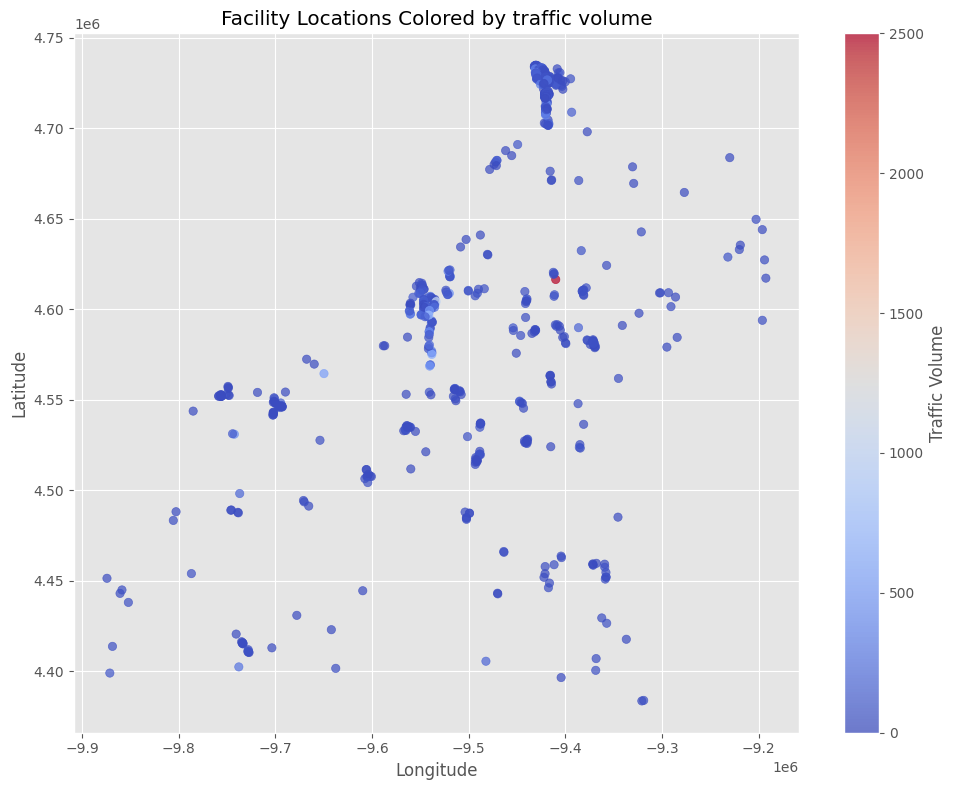

In [104]:
plt.figure(figsize=(10, 8))
sc = plt.scatter(joined_df["x"], joined_df["y"], c=joined_df["avg_tractor_trailers"], cmap="coolwarm", alpha=0.7)
plt.colorbar(sc, label="Traffic Volume")
plt.title("Facility Locations Colored by traffic volume")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

The above map shows the locations of high traffic areas and may be possible areas of concern for traffic jams and may need infastructure improvements

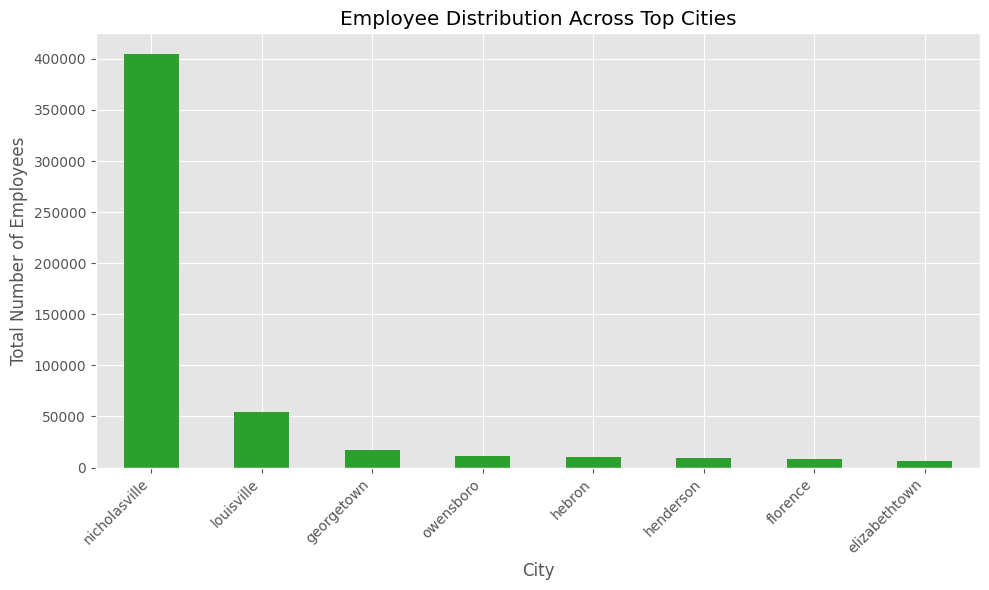

In [105]:
city_employees = joined_df.groupby("city_name")["number_of_employees"].sum().sort_values(ascending=False).head(8)

plt.figure(figsize=(10, 6))
city_employees.plot(kind="bar", color="#2ca02c")  # Deep green for contrast
plt.title("Employee Distribution Across Top Cities")
plt.xlabel("City")
plt.ylabel("Total Number of Employees")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()




The above bar graph shows where people work the most this probably isnt accurate

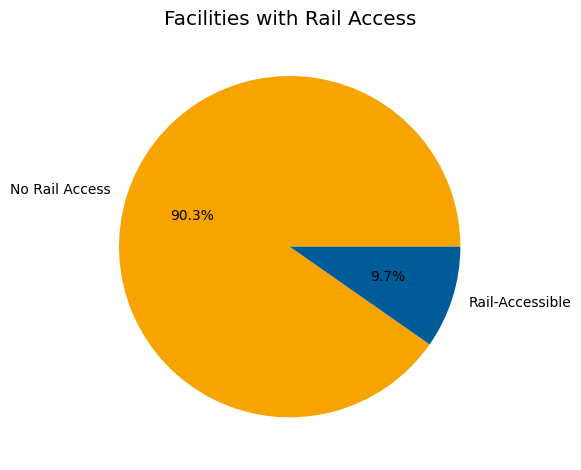

In [106]:
joined_df["has_rail"] = joined_df["facility_length_of_rail"] > 0
rail_counts = joined_df["has_rail"].value_counts()
labels = ["No Rail Access", "Rail-Accessible"] if rail_counts.index[0] == False else ["Rail-Accessible", "No Rail Access"]
plt.pie(rail_counts, labels=labels, autopct="%1.1f%%", colors=["#f7a400", "#005c99"])
plt.title("Facilities with Rail Access")
plt.tight_layout()
plt.show()

This shows how many facilites have rail access

In [107]:
# create a copy of the cleaned DataFrame for future use
future_df = merged_df_cleaned.copy()

In [115]:
city_planing_df = merged_df_cleaned.copy()

In [ ]:
# Infrastructure & Physical Structure
infra_cols = [
    'building_height_ft',
    'loading_dock_clearance_height_ft',
    'number_of_facility_floors',
    'facility_blueprint_available',
    'roof_type',
    'roof_load_capacity_lbs_per_sqft',
    'building_material_type',
    'hvac_system_capacity_tons',
    'facility_renovation_year',
    'elevator_count',
    'interior_ceiling_height_ft',
    'floor_material_type',
    'window_count',
    'facility_insulation_rating',
    'fire_suppression_system_type',
    'emergency_exit_count',
    'intercom_system_present'
]

# Onsite Traffic & Wayfinding
onsite_cols = [
    'number_of_onsite_lanes',
    'one_way_access_flag',
    'onsite_speed_limit_mph',
    'vehicle_check_in_point_description',
    'onsite_routing_signage_present',
    'access_gate_count',
    'security_checkpoint_presence',
    'badge_scanning_enabled',
    'fire_lane_presence',
    'surveillance_camera_count',
    'truck_weight_scale_present',
    'loading_bay_sensor_count'
]

# Logistics Flow & Performance
flow_cols = [
    'avg_daily_shipments',
    'avg_daily_pickups',
    'avg_delivery_vehicles',
    'avg_arrival_delay',
    'avg_unload_time_minutes',
    'avg_wait_time_for_drivers',
    'avg_items_per_delivery',
    'failed_delivery_count',
    'retries_allowed',
    'delivery_success_rate',
    'daily_vehicle_volume',
    'rerouting_likelihood_score',
    'dynamic_reroute_triggered',
    'staging_area_turnover_rate',
    'delivery_hotspot_flag',
    'route_override_enabled',
    'dispatch_window_start',
    'dispatch_window_end',
    'delivery_zone_priority',
    'dropoff_instructions',
    'handoff_confirmation_type',
    'preferred_entry_method',
    'optimal_delivery_window',
    'delivery_confirmation_method'
]

# Delivery App & Integration Hooks
app_cols = [
    'status_tracking_enabled',
    'app_feedback_rating',
    'qr_code_drop_validation',
    'driver_assignment_policy',
    'mobile_platform_tags',
    'package_size_category',
    'signature_required',
    'contactless_option_available',
    'shipment_modes',
    'delivery_zones',
    'pickup_zones',
    'pickup_zone_count',
    'mapping_app_compatible',
    'live_feed_endpoint',
    'webhook_notification_enabled',
    'api_endpoint_reference',
    'source_auth_method',
    'data_refresh_schedule',
    'delivery_app_update_timestamp'
]

# Traffic & Routing Intelligence
traffic_cols = [
    'route_congestion_score',
    'traffic_flow_rating',
    'traffic_disruption_score',
    'traffic_signal_distance_ft',
    'access_road_flooding_risk_score',
    'road_grade_percentage',
    'adjacent_road_surface_type',
    'road_width_ft',
    'road_curve_severity_score',
    'road_maintenance_rating',
    'truck_route_compliance_flag',
    'route_window_volatility_score',
    'route_simulation_accuracy_score',
    'traffic_sync_interval_minutes',
    'routing_api_zone_tag'
]

# Spatial & Geographic Anchors (x, y already exist so omitted here)
spatial_cols = [
    'gis_shape_id',
    'facility_boundary_polygon',
    'facility_centroid_x_y',
    'primary_route_geometry_blob',
    'route_to_facility_polyline',
    'mapping_boundary_polygon_id',
    'osm_edge_ids_nearby',
    'road_network_cluster_id',
    'geo_fencing_radius_meters'
]

# Environmental & Weather Risk
env_cols = [
    'weather_disruption_flag',
    'weather_delay_frequency_score',
    'flood_zone_indicator',
    'average_snowfall_inches_yearly',
    'wind_exposure_index',
    'sun_exposure_rating',
    'storm_drainage_quality',
    'nearest_hazardous_weather_zone_id',
    'air_quality_index_zone',
    'proximity_to_waterway',
    'wildlife_crossing_zone_flag',
    'local_event_impact_risk'
]

# Utilities, Services & Resilience
service_cols = [
    'electric_vehicle_charging_ports',
    'cold_storage_available',
    'fuel_station_on_premises',
    'garbage_collection_schedule',
    'utility_provider_name',
    'facility_water_source_type',
    'public_road_maintenance_agency',
    'power_backup_available',
    'generator_fuel_type',
    'power_grid_stability_score',
    'emergency_power_runtime_hours',
    'backup_facility_designation',
    'disaster_plan_document_url',
    'evacuation_plan_available',
    'hazmat_handling_capable',
    'emergency_response_team_present',
    'alternate_facility_id_for_emergency_reroute',
    'known_incident_frequency_score',
    'facility_resilience_score',
    'emergency_exits_gps_coordinates',
    'critical_asset_protection_rating'
]

# Audit, Contributor & Governance
audit_cols = [
    'last_modified_by',
    'contributor_id',
    'contributor_notes',
    'field_origin_source_type',
    'update_frequency_class',
    'column_update_log',
    'schema_version',
    'field_visibility_level',
    'created_at',
    'updated_at',
    'record_source',
    'row_status'
]

# Regulatory & Compliance
regulatory_cols = [
    'regulatory_compliance_score',
    'permits_required_list',
    'hazmat_permit_flag',
    'last_inspection_date',
    'next_inspection_due_date',
    'violation_count_past_year'
]

# Maintenance & Asset Management
maintenance_cols = [
    'scheduled_maintenance_date',
    'last_maintenance_date',
    'maintenance_provider_id',
    'equipment_uptime_percentage',
    'maintenance_downtime_hours',
    'asset_depreciation_rate'
]

# Sustainability & Energy
sustain_cols = [
    'solar_panel_capacity_kw',
    'energy_consumed_kwh_monthly',
    'water_consumption_gallons_day',
    'recycling_rate_percentage',
    'green_certification_id',
    'carbon_emission_tons_annual'
]

# Workforce & Safety
safety_cols = [
    'number_of_shifts_per_day',
    'average_staff_count_per_shift',
    'first_aid_station_count',
    'cctv_camera_count',
    'noise_level_db',
    'lighting_level_lux',
    'worker_incident_rate_per_1000'
]

# Supply Chain & Finance
finance_cols = [
    'average_shipping_cost_usd',
    'toll_cost_usd_per_trip',
    'fuel_cost_usd_monthly',
    'third_party_logistics_cost_usd',
    'inventory_holding_cost_usd_daily',
    'payment_terms_days'
]

# Environmental Monitoring
env_mon_cols = [
    'road_surface_temperature_c',
    'ambient_temperature_c',
    'humidity_percentage',
    'air_pollution_index',
    'soil_moisture_percentage',
    'noise_pollution_index'
]

# Connectivity & IoT Enhancements
iot_cols = [
    'cellular_signal_provider',
    'gps_signal_strength_db',
    'edge_node_count',
    'iot_device_battery_average',
    'real_time_streaming_enabled',
    'firmware_last_update_timestamp'
]

# Geographic & Terrain Depth
terrain_cols = [
    'nearest_steep_incline_percentage',
    'floodplain_zoning_code',
    'rock_type_classification',
    'fault_line_proximity_km',
    'landslide_risk_score',
    'permafrost_presence_flag'
]

# Delivery Vertical & Packaging Details
vertical_cols = [
    'shipment_category',    
    'fragility_rating',            
    'packaging_type',              
    'palletized_flag',               
    'number_of_pallets',
    'weight_kg',
    'dimensions_lxwxh_cm',        
    'volumetric_weight_kg'
]

# Perishable & Temperature Control
temp_cols = [
    'perishable_flag',                
    'temperature_control_required',   
    'refrigeration_type',             
    'min_temperature_c',
    'max_temperature_c',
    'shelf_life_days'
]

# Handling & Special Instructions
handling_cols = [
    'handling_instructions',         
    'stack_limit_layers',             
    'loading_unloading_equipment',    
    'hazardous_material_flag',        
    'hazmat_class',                   
    'dmf_packaging_required',         
]

# Load-Board & Freight / Oversize / Super-loads
freight_cols = [
    'load_board_listing_id',
    'freight_mode',                 
    'freight_class',                  
    'total_load_weight_lbs',
    'max_axle_weight_lbs',
    'oversize_flag',                 
    'oversize_dimensions_ft',         
    'superload_flag',                
    'permit_required_flag',           
    'escort_vehicle_required',        
    'pickup_facility_ready_time',     
    'delivery_facility_available_time',
    'load_board_bid_price_usd',
    'carrier_assigned_id'
]

# Restaurant & Quick-Serve Details
restaurant_cols = [
    'cuisine_type',            
    'menu_categories',                  
    'menu_update_timestamp',            
    'average_prep_time_minutes',        
    'order_minimum_value_usd',          
    'health_inspection_rating',         
    'peak_order_volume_per_hour',       
    'dine_in_available_flag',           
    'outdoor_seating_available_flag',   
    'drive_thru_available_flag',        
    'curbside_pickup_flag',             
    'contactless_pickup_instructions',  
    'digital_menu_url',                 
    'pos_system_type',
    'restaurant_api'                   
]

# Grocery Store & Supermarket Details
grocery_cols = [
    'store_type',                   
    'department_list',                 
    'aisles_count',                    
    'bulk_section_flag',                
    'fresh_produce_flag',               
    'frozen_section_flag',              
    'deli_section_flag',                
    'bakery_section_flag',              
    'curbside_pickup_slots_count',           
    'store_layout_map_url',             
    'out_of_stock_alert_flag',          
    'inventory_update_timestamp',       
    'cutoff_time_for_same_day_delivery',
    'perishable_notification_flag',     
    'shopping_cart_capacity',           
    'bag_type_available',               
    'price_match_policy_flag', 
    'grocery_store_api'           
]


planning_infra_cols = [
    # Site Footprint & Zoning
    'site_area_acres',
    'impervious_surface_pct',
    'green_space_pct',
    'floor_area_ratio',
    'max_building_coverage_ratio',
    'allowed_max_height_ft',
    'zoning_code',
    'zoning_variance_flag',
    # Utilities & Services
    'water_connection_pressure_psi',
    'sewer_connection_diameter_in',
    'stormwater_retention_capacity_cuft',
    'electric_service_voltage_kV',
    'telecom_provider_name',
    # Transport Access & Traffic Planning
    'nearest_highway_interchange_distance_mi',
    'intersection_control_type',        
    'turning_movement_lanes',           
    'peak_hour_traffic_volume',         
    'pedestrian_crossing_present',      
    'bike_lane_presence',               
    # Expansion & Construction
    'expansion_land_available_acres',
    'planned_construction_start_date',
    'planned_construction_end_date',
    'construction_permit_id',
    'master_plan_id',                   
    # Environmental Constraints
    'wetlands_presence_flag',          
    'floodplain_zone',                  
    'site_slope_percent',              
    'soil_bearing_capacity_psf',
    'brownfield_site_flag',            
    # Resilience & Risk
    'earthquake_hazard_zone',           
    'hurricane_wind_zone',              
    'stormwater_overflow_flag',        
    'extreme_temp_design_rating'        
]

# Driver info
driver_cols = [
    'driver_id',                       
    'driver_name',                     
    'driver_license_number',           
    'driver_license_type',             
    'license_issue_date',              
    'license_expiry_date',             
    'driver_status',                   
    'driver_hire_date',                
    'driver_termination_date',         
    'driver_phone',                    
    'driver_email',                   
    'home_base_facility_id',           
    'shift_start_time',                
    'shift_end_time',                  
    'max_work_hours_per_day',          
    'cumulated_hours_this_week',       
    'on_leave_flag',                   
    'last_leave_start_date',           
    'last_leave_end_date',             
    'background_check_passed',         
    'last_background_check_date',      
    'drug_test_date',                  
    'medical_certification_expiry',    
    'training_level',                  
    'certifications',                  
    'language_skills',                 
    'preferred_vehicle_type',          
    'average_delivery_time_minutes',   
    'on_time_delivery_pct',            
    'safety_incident_count',           
    'customer_rating_avg',            
    'last_rating_update_ts',           
    'current_location_lat',            
    'current_location_lon',            
    'last_location_update_ts'          
]





all_new_columns = infra_cols + onsite_cols + flow_cols + app_cols + \
                  traffic_cols + spatial_cols + env_cols + \
                  service_cols + audit_cols + regulatory_cols + \
                  maintenance_cols + sustain_cols + safety_cols + \
                  finance_cols + env_mon_cols + iot_cols + terrain_cols + \
                  vertical_cols + temp_cols + handling_cols + freight_cols + \
                  restaurant_cols + grocery_cols + planning_infra_cols + driver_cols

all_new_columns = list(OrderedDict.fromkeys(all_new_columns))

# Creates an empty DataFrame with those columns
new_cols_df = pd.DataFrame(
    {col: np.nan for col in all_new_columns},
    index=future_df.index
)

# Concatenate
future_df = pd.concat([future_df, new_cols_df], axis=1)



In [117]:
future_df.columns

Index(['facility_name', 'naics_code', 'facility_description',
       'area_development_district', 'district_name', 'web_url',
       'loading_docks', 'avg_tractor_trailers', 'avg_trains_per_week',
       'number_of_rail_doors',
       ...
       'language_skills', 'preferred_vehicle_type',
       'average_delivery_time_minutes', 'on_time_delivery_pct',
       'safety_incident_count', 'customer_rating_avg', 'last_rating_update_ts',
       'current_location_lat', 'current_location_lon',
       'last_location_update_ts'],
      dtype='object', length=867)

In [118]:
future_df.shape

(680, 867)